In [501]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [502]:
from collections import Counter

## 생로랑

In [503]:
mag_s = pd.read_csv('./magazine/final/magazine_s_stickword.csv', sep ='|', encoding = 'utf-8')

In [504]:
mag_s

,magazine,brand,title,link,date,word_laurent,ADFN,ADFN_2
0,A,YSL,"깊게 뿌리내리기 위하여, 수영",http://www.allurekorea.com/2020/11/20/%ea%b9%8...,2020-11-20,"['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '..."
1,A,YSL,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-10-26,"['클래식한 캐멀 컬러 코트는 1백78만원, 우영미(Wooyoungmi). 버건디 ...","['클래식', '컬러', '코트', '우영', 'WOOYOUNGMI', '버건디',...","['클래식', '컬러', '코트', '우영', 'WOOYOUNGMI', '버건디',..."
2,A,YSL,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-10-26,"[' 짙은 그레이 컬러의 데님 팬츠는 95만5천원, 생로랑 바이 안토니 바카렐로(...","['짙', '그레이', '컬러', '데님', '팬츠', 'LAURENT', 'ANT...","['짙', '그레이', '컬러', '데님', '팬츠', 'LAURENT', 'ANT..."
3,A,YSL,안경 하세요?!,http://www.allurekorea.com/2020/10/29/%ec%95%8...,2020-10-23,"[' YSL 모노그램을 새긴 블랙 에나멜 안경다리의 둥근 금테 안경은 40만원대,...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',..."
4,A,YSL,"가을의 정석, 트렌치 코트 입는 법 8가지",http://www.allurekorea.com/2020/10/11/%ea%b0%8...,2020-09-27,"['컬러블록 트렌치코트는 가격미정, 르쥬(Leje). 컵케이크 프린트 티셔츠는 27...","['컬러', '블록', '트렌치', '코트', 'LEJE', '컵', '케이크', ...","['컬러', '블록', '트렌치', '코트', 'LEJE', '컵', '케이크', ..."
...,...,...,...,...,...,...,...,...
1269,W,YSL,어깨로말해요,http://www.wkorea.com/2016/09/05/%ec%96%b4%ea%...,2016-09-05,"[""'어깨 좀 쓴다 하는 여인들이 모두 모였다. 이 현상은 특히 젊은 디자이너들의 ...","['어깨', '여인', '모이', '현상', '젊', '디자이너', '의상', '드...","['어깨', '여인', '모이', '현상', '젊', '디자이너', '의상', '드..."
1270,W,YSL,W해시태그,http://www.wkorea.com/2016/09/02/w%ed%95%b4%ec...,2016-09-02,"['#W뷰티콕 (뷰티 디렉터 송시은)\\n조회 2,023회\\n너무나 뜨거운 여름...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',..."
1271,W,YSL,따로 또 같이,http://www.wkorea.com/2016/09/02/%eb%94%b0%eb%...,2016-09-02,['중성적인 스타일링을 위해선 실루엣을 활용하는 방법에 주목해야 한다. 생로랑 남성...,"['중', '성적', '스타일링', '서', '실루엣', '활용', '방법', '주...","['중', '성적', '스타일링', '서', '실루엣', '활용', '방법', '주..."
1272,W,YSL,두려움 없는 반란,http://www.wkorea.com/2016/09/01/%eb%91%90%eb%...,2016-09-01,['이러한 맥락은 오늘날 브랜드의 모델 캐스팅에도 그대로 적용된다. 일례로 유명한 ...,"['맥락', '오늘날', '브랜드', '모델', '캐스팅', '적용', '일례', ...","['맥락', '오늘날', '브랜드', '모델', '캐스팅', '적용', '일례', ..."


In [505]:
mag_s['word'] = mag_s['word_laurent']

In [506]:
mag_S = mag_s[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [507]:
len(mag_S)

1274

### 6

In [508]:
idx6 = []
for i in range(len(mag_S)):
    if i % 6 == 0 :
        idx6.append(i)

In [509]:
mag_S6 = mag_S.loc[idx6]

In [510]:
mag_S6.reset_index(drop = True, inplace = True)

In [511]:
len(mag_S6)

213

### 8

In [512]:
idx8 = []
for i in range(len(mag_S)):
    if i % 8 == 0 :
        idx8.append(i)

In [513]:
mag_S8 = mag_S.loc[idx8]

In [514]:
mag_S8.reset_index(drop = True, inplace = True)

In [515]:
len(mag_S8)

160

## 로제

### 로제 (유튜브 + 매거진)

In [516]:
tot_ro = pd.read_csv('./tot_rose_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [517]:
tot_ro['word'] = tot_ro['word_rose']

In [518]:
tot_R = tot_ro[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [519]:
len(tot_R)

140

### 생로랑 + 로제

In [520]:
S6R = pd.concat([mag_S6, tot_R])

In [521]:
S6R.reset_index(drop = True, inplace = True)

In [522]:
S6R.to_csv('./magazine/final/S6R.csv', sep = '|', encoding = 'utf-8', index = False)

In [523]:
len(S6R)

353

In [524]:
# for word in mag_jenny['word_jenny']:
#     if '걸' in word:
#         print(word)
#         print('-'*50)

In [525]:
for word in S6R['ADFN_2']:
    if "elegance" in word:
        print(word)
        print('-'*50)

['영어', '자막', '추가', '되었습니다', '즐겁게', '감상', '부탁드려요', 'English', 'subtitles', 'have', 'been', 'added', 'Please', 'have', 'fun', '사기', '캐릭', '천진난만', '순수한', '소녀', '카메라', '서면', '프로', '쌉', '프로', 'She', 'just', 'phenomenal', 'that', 'innocent', 'laugh', 'switched', 'badass', 'with', 'camera', 'on', '로제', '전설', '미모', '실화', '인생', '행복하다', '살아야지', 'BLACKPINK', '사랑', '없으면', '살겠다', '고맙다', '고마워', '수고', '했어', '힘들지', '않았으면', '로제', '예쁘다', '수많은', '오해', '거짓', '루머', '질투', '맘', '상하', '걸어가는', '멋진', '찐가수가', '되길', '바', '멀리', '애정', '싸랑', '챙', '이를', '사랑', '로제', '볼때', '할말을', '잃게', '만드는구나', '매력', '끝', '도대체', '우아하고', '귀엽다', '하네', '서른', '넘은', '여잔', '갑자기', '늦덕', '입성', '며칠', '째', '친구', '빠져나오고', '있음', 'The', 'Most', 'Expensive', 'KPOP', 'Photo', 'Shoot', 'Of', 'All', 'Time', 'Artist', '로제', 'BLACKPINK', '로제', '로제', '로제', 'behind', '로제', 'scene', 'No', 'matter', 'how', 'long', 'takes', 'will', 'wait', 'for', 'Chaeyoung', 'no', 'matter', 'how', 'long', 'whether', 'be', 'year', 'or', 'even', 'will', 'never', 'leave', 'even

In [526]:
# love
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("love", "사랑")
# 걸그룹
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'원', '탑'", "원탑")

In [527]:
# 로제
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("朴彩英哭戏", "로제")
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("朴彩瑛", "로제")
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("PARKCHAEYOUNG", "로제")

In [528]:
# 인간
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("HUMAN", "인간")
# 생로랑
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("MISSSAINTLAURENT", "'인간', 'LAURENT'")

In [529]:
# 귀엽다
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'귀엽'", "귀엽다")
# 귀엽다
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'귀여운'", "귀엽다")

In [530]:
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("♡", "")

In [531]:
# 하이틴
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'하이', '틴'", "하이틴")

In [532]:
# 프리티
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'프리', '티'", "프리티")
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'푸리', '티'", "프리티")

# 프리티
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'스포', '티'", "스포티")

In [533]:
# 비주얼
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'비주'", "비주얼")

In [534]:
# 퀸
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'QUINN'", "퀸")
# 퀸
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'QUEEN'", "퀸")


In [535]:
# 로랑
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("'YSL'", "LAURENT")

In [536]:
# love
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace("elegance", "우아")

## stopword 추가

In [537]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [538]:
sw_df.columns = ['stopword']

In [539]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [540]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [541]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [542]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '♡', '♡','♡',
         '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각', '아는', 
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어', 
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해',
        '링', '한편', '️⃣',
        '람쥐', '아닌가', '도민준', '없네', '이수근', '아이유', 'our', '젠', '였다면', '올해', '미우', 'The', 'my', '이란',
        '그게', '같고', '아니다', '아닌데', '있지',  '만큼', '백예린', '같네', 'we', '있게', '덕분', '있어서', '든', '썸넬',
        '라서', '여서', '라면', '인지', 'a','와중', '하자', '이후', '해야', '예전', '막',
        '없어', '왜케', 'You', 'THE', 'your', 'u', 'AN', '수가',
        'MUCH', 'FORTIFFANYANDCO', 'TIFFANYANDCO', 'ahh', 'her', 'knew', '않고', '보니']
for w in add_0:
    stop_words.append(w)

In [543]:
add_1 = ['BLACKPINK', '제니', '지수', '리사']
for w in add_1:
    stop_words.append(w)

In [544]:
len(stop_words)

887

In [545]:
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [546]:
noun_adj_list = []
for i in range(len(S6R)):
    for word in S6R.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [547]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('로제', 9279), ('예쁘다', 1383), ('귀엽다', 1064), ('사랑', 798), ('노래', 697), ('목소리', 635), ('LAURENT', 614), ('음색', 481), ('솔로', 401), ('음악', 311), ('챙', 311), ('무대', 301), ('BEST', 296), ('머리', 253), ('춤', 251), ('매력', 248), ('느낌', 217), ('레전드', 213), ('아이돌', 209), ('패션', 193), ('처음', 178), ('금발', 178), ('직캠', 175), ('코첼라', 173), ('머리카락', 167), ('여자', 156), ('인간', 154), ('바람', 150), ('스타일', 148), ('최고', 148), ('브랜드', 138), ('영어', 138), ('여신', 138), ('공주', 128), ('창법', 124), ('입덕', 117), ('몸매', 115), ('춤선', 115), ('가수', 110), ('분위기', 107), ('컬렉션', 106), ('모델', 103), ('한국', 95), ('쇼', 94), ('드레스', 90), ('', 90), ('찰떡', 86), ('스타', 86), ('퀸', 85), ('디자이너', 84), ('실력', 84), ('대박', 83), ('ANTHONY', 78), ('발음', 78), ('여성', 77), ('짱', 76), ('컬러', 75), ('블랙', 72), ('라이브', 72), ('애교', 71), ('파리', 70), ('하우스', 70), ('봄', 68), ('보컬', 67), ('멋있다', 66), ('BLINK', 65), ('왕', 64), ('미모', 64), ('소리', 64), ('천사', 63), ('신', 62), ('요정', 62), ('시작', 62), ('명품', 61), ('헤어', 61), ('핑크', 59), ('허리', 58), ('순간', 

In [548]:
count = Counter(noun_adj_list)

In [549]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('로제', 9279)
('예쁘다', 1383)
('귀엽다', 1064)
('사랑', 798)
('노래', 697)
('목소리', 635)
('LAURENT', 614)
('음색', 481)
('솔로', 401)
('음악', 311)
('챙', 311)
('무대', 301)
('BEST', 296)
('머리', 253)
('춤', 251)
('매력', 248)
('느낌', 217)
('레전드', 213)
('아이돌', 209)
('패션', 193)
('처음', 178)
('금발', 178)
('직캠', 175)
('코첼라', 173)
('머리카락', 167)
('여자', 156)
('인간', 154)
('바람', 150)
('스타일', 148)
('최고', 148)
('브랜드', 138)
('영어', 138)
('여신', 138)
('공주', 128)
('창법', 124)
('입덕', 117)
('몸매', 115)
('춤선', 115)
('가수', 110)
('분위기', 107)
('컬렉션', 106)
('모델', 103)
('한국', 95)
('쇼', 94)
('드레스', 90)
('', 90)
('찰떡', 86)
('스타', 86)
('퀸', 85)
('디자이너', 84)
('실력', 84)
('대박', 83)
('ANTHONY', 78)
('발음', 78)
('여성', 77)
('짱', 76)
('컬러', 75)
('블랙', 72)
('라이브', 72)
('애교', 71)
('파리', 70)
('하우스', 70)
('봄', 68)
('보컬', 67)
('멋있다', 66)
('BLINK', 65)
('왕', 64)
('미모', 64)
('소리', 64)
('천사', 63)
('신', 62)
('요정', 62)
('시작', 62)
('명품', 61)
('헤어', 61)
('핑크', 59)
('허리', 58)
('순간', 58)
('심장', 58)
('표정', 58)
('고급', 57)
('인기', 57)
('다리', 57)
('재킷', 55)
('사기', 5

In [550]:
top500 = pd.DataFrame(word_list)

In [551]:
top500.columns = ['word', 'count']

In [552]:
top500.to_csv('./S6R_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [553]:
import matplotlib.pyplot as plt

In [554]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [555]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [556]:
from wordcloud import WordCloud

In [557]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

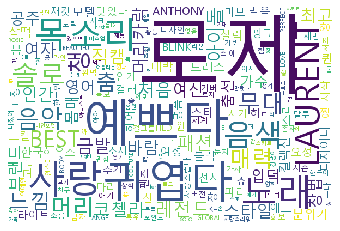

In [558]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_S6R.png')

In [559]:
S8R.to_csv('./magazine/final/S8R_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)

In [560]:
S6R.to_csv('./magazine/final/S6R_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)